In [1]:
Sys.setenv(SPARK_HOME="/Users/jonathandinu/spark-1.4.1-bin-hadoop2.4/")

In [2]:
.libPaths(c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib"), .libPaths())) 

In [3]:
library(SparkR)


Attaching package: ‘SparkR’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, sample, table



In [4]:
vec <- c(1,2,3)

In [5]:
typeof(vec)

[1] "double"

In [6]:
sc = sparkR.init(sparkPackages='com.databricks:spark-csv_2.11:1.0.3')

Launching java with spark-submit command /Users/jonathandinu/spark-1.4.1-bin-hadoop2.4//bin/spark-submit  --packages com.databricks:spark-csv_2.11:1.0.3 sparkr-shell /var/folders/wf/h5v75xw52g1b7wz7lwrllwrm0000gn/T//Rtmp7MsxUb/backend_port121834580db65 


In [7]:
sqlContext <- sparkRSQL.init(sc)

In [8]:
# Replace <AWS_ACCESS_KEY_ID> and <AWS_SECRET_ACCESS_KEY> with your credentials
link <- 's3n://<AWS_ACCESS_KEY_ID>:<AWS_SECRET_ACCESS_KEY>@mortar-example-data/airline-data'

[Instructions to get AWS credentials](http://www.slideshare.net/jonathandinu/the-data-scientists-guide-to-apache-spark/113?src=clipshare)

You can also download a ZIP of the airline data here: http://hopelessoptimism.com/static/data/airline-data

Or find the original (unparsed) files here: http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

In [9]:
flights <- read.df(sqlContext, link, source = "com.databricks.spark.csv", header='true')

In [10]:
head(flights)

,YEAR,MONTH,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,"c("""", """", """", """", """", """")"
1,2012,4,AA,12478,12892,-4.00,0.00,-21.00,0.00,0.00,
2,2012,4,AA,12478,12892,-7.00,0.00,-65.00,0.00,0.00,
3,2012,4,AA,12478,12892,-6.00,0.00,-63.00,0.00,0.00,
4,2012,4,AA,12478,12892,-6.00,0.00,5.00,5.00,0.00,
5,2012,4,AA,12478,12892,-2.00,0.00,-39.00,0.00,0.00,
6,2012,4,AA,12478,12892,-6.00,0.00,-34.00,0.00,0.00,


In [11]:
printSchema(flights)

root
 |-- YEAR: string (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN_AIRPORT_ID: string (nullable = true)
 |-- DEST_AIRPORT_ID: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- DEP_DELAY_NEW: string (nullable = true)
 |-- ARR_DELAY: string (nullable = true)
 |-- ARR_DELAY_NEW: string (nullable = true)
 |-- CANCELLED: string (nullable = true)
 |-- : string (nullable = true)


In [12]:
subset <- select(flights, flights$DEP_DELAY, flights$ARR_DELAY, 
                 flights$ORIGIN_AIRPORT_ID, flights$DEST_AIRPORT_ID)

In [13]:
persist(subset, 'MEMORY_AND_DISK')

DataFrame[DEP_DELAY:string, ARR_DELAY:string, ORIGIN_AIRPORT_ID:string, DEST_AIRPORT_ID:string]

In [14]:
head(subset)

,DEP_DELAY,ARR_DELAY,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID
1,-4.00,-21.00,12478,12892
2,-7.00,-65.00,12478,12892
3,-6.00,-63.00,12478,12892
4,-6.00,5.00,12478,12892
5,-2.00,-39.00,12478,12892
6,-6.00,-34.00,12478,12892


In [15]:
dtypes(subset)

[[1]]
[1] "DEP_DELAY" "string"   

[[2]]
[1] "ARR_DELAY" "string"   

[[3]]
[1] "ORIGIN_AIRPORT_ID" "string"           

[[4]]
[1] "DEST_AIRPORT_ID" "string"

In [16]:
help(cast)

Column-class {SparkR},R Documentation
start,starting position
stop,ending position
jc,reference to JVM DataFrame column


In [17]:
subset$DEP_DELAY <- cast(flights$DEP_DELAY, 'double')

In [18]:
subset$ARR_DELAY <- cast(flights$ARR_DELAY, 'double')

In [19]:
head(subset)

,DEP_DELAY,ARR_DELAY,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID
1,-4,-21,12478,12892
2,-7,-65,12478,12892
3,-6,-63,12478,12892
4,-6,5,12478,12892
5,-2,-39,12478,12892
6,-6,-34,12478,12892


In [20]:
dtypes(subset)

[[1]]
[1] "DEP_DELAY" "double"   

[[2]]
[1] "ARR_DELAY" "double"   

[[3]]
[1] "ORIGIN_AIRPORT_ID" "string"           

[[4]]
[1] "DEST_AIRPORT_ID" "string"

In [21]:
groupedDest <- groupBy(subset, subset$DEST_AIRPORT_ID)

In [22]:
groupedOrigin <- groupBy(subset, subset$ORIGIN_AIRPORT_ID)

In [23]:
dest_mean <- mean(groupedDest) 
origin_mean <- mean(groupedOrigin) 

In [24]:
persist(dest_mean, "MEMORY_AND_DISK")
persist(origin_mean, "MEMORY_AND_DISK")

DataFrame[DEST_AIRPORT_ID:string, AVG(DEP_DELAY):double, AVG(ARR_DELAY):double]

DataFrame[ORIGIN_AIRPORT_ID:string, AVG(DEP_DELAY):double, AVG(ARR_DELAY):double]

In [25]:
head(dest_mean)

,DEST_AIRPORT_ID,AVG(DEP_DELAY),AVG(ARR_DELAY)
1,13277,9.15473,4.218445
2,10154,11.55836,5.574132
3,11540,8.811215,5.393523
4,10155,6.09744,1.539289
5,12884,14.57728,12.30103
6,12389,8.580357,-2.117117


In [26]:
head(arrange(dest_mean, dest_mean$'AVG(ARR_DELAY)'))

,DEST_AIRPORT_ID,AVG(DEP_DELAY),AVG(ARR_DELAY)
1,12343,-12.70192,-17.41346
2,12888,-0.9433962,-9.288462
3,11415,5.187702,-7.711974
4,10466,-0.25,-7.4375
5,12335,0.01,-6.04
6,10158,1.09589,-5.625


In [27]:
head(arrange(dest_mean, desc(dest_mean$'AVG(ARR_DELAY)')))

,DEST_AIRPORT_ID,AVG(DEP_DELAY),AVG(ARR_DELAY)
1,10930,30.08428,27.36458
2,13424,23.66904,23.38878
3,14487,23.61354,22.1876
4,13459,20.8876,20.84884
5,10157,23.72505,20.40944
6,13964,21.90948,16.91349


In [28]:
dest_mean <- withColumnRenamed(dest_mean, 'AVG(ARR_DELAY)', 'avg_arr_delay')

In [29]:
head(dest_mean)

ERROR: Error: returnStatus == 0 is not TRUE


In [30]:
arrange(dest_mean, desc(dest_mean$avg_arr_delay))

DataFrame[DEST_AIRPORT_ID:string, AVG(DEP_DELAY):double, avg_arr_delay:double]

## Big Data... Small Learning

In [31]:
# install.packages("ggplot2")
library(ggplot2)

In [32]:
local_df <- collect(dest_mean)

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


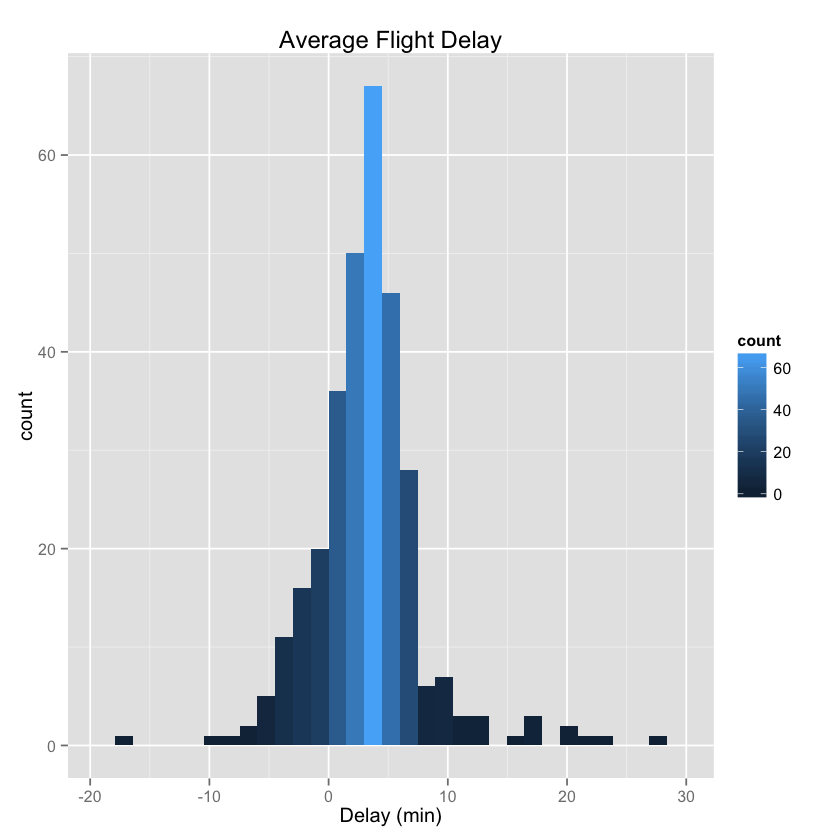

In [33]:
#ggplot(data=local_df, aes(x='Delay (min)')) + geom_histogram(aes(fill=..count..))
ggplot(data=local_df, aes(x=local_df$avg_arr_delay)) + geom_histogram(aes(fill=..count..)) + ggtitle("Average Flight Delay") + xlab('Delay (min)')

## Putting it All together

In [ ]:
# use Spark CSV to load data
flights <- read.df(sqlContext, link, source = "com.databricks.spark.csv", header='true')

# subset columns needed
subset <- select(flights, flights$DEP_DELAY, flights$ARR_DELAY, 
                 flights$ORIGIN_AIRPORT_ID, flights$DEST_AIRPORT_ID)

# cast delay columns to double type
subset$DEP_DELAY <- cast(flights$DEP_DELAY, 'double')
subset$ARR_DELAY <- cast(flights$ARR_DELAY, 'double')

# group by airport and compute mean
groupedDest <- groupBy(subset, subset$DEST_AIRPORT_ID)
groupedOrigin <- groupBy(subset, subset$ORIGIN_AIRPORT_ID)

dest_mean <- mean(groupedDest) 
origin_mean <- mean(groupedOrigin) 

# convert SparkR dataframe to R dataframe
dest_mean <- withColumnRenamed(dest_mean, 'AVG(ARR_DELAY)', 'avg_arr_delay')
local_df <- collect(dest_mean)

# visualize with ggplot2
ggplot(data=local_df, aes(x=local_df$avg_arr_delay)) + geom_histogram(aes(fill=..count..)) + ggtitle("Average Flight Delay") + xlab('Delay (min)')